In [1]:
from preprocessing import Audio
import librosa as li
import librosa.display
import numpy as np
import IPython.display as ipd
import os
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
import sounddevice as sd
import time

tf.debugging.set_log_device_placement(True)

GPU = tf.config.list_logical_devices('GPU')
CPU = tf.config.list_logical_devices('CPU')
DEVICE = GPU[0].name if GPU else CPU[0].name
print(DEVICE)

/device:GPU:0


In [7]:
# Create some tensors
with tf.device('/GPU:0'):
    a = tf.constant([[2.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[2.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(b, a)

In [3]:
PATH_0 = r'F:\NewData\Done\1'
PATH_1 = r'F:\NewData\Done\2'
print(PATH_0, PATH_1)
PATHS = li.util.find_files(PATH_0)[:650] + li.util.find_files(PATH_1)

SOUNDS = [Audio(path) for path in PATHS]

print(len(SOUNDS))
print(len(li.util.find_files(PATH_0)), len(li.util.find_files(PATH_1)))

F:\NewData\Done\1 F:\NewData\Done\2
731
20814 81


In [5]:
print(SOUNDS[5].data)
print(SOUNDS[5].get_energy())

[-0.00479323 -0.00536234 -0.00502607 ...  0.00283799  0.00342803
  0.        ]
[5.64046910e-03 2.93468052e-03 1.31209045e+00 3.91905925e+00
 1.55253572e+00 5.36467475e+00 5.94025269e+00 2.41518553e+00
 1.78089490e+00 1.11978556e+00 1.71557205e+01 7.32660676e+01
 1.32959415e+02 1.24210160e+02 1.18966024e+02 2.05341291e+02
 3.51510808e+02 3.34590551e+02 2.82121818e+02 2.47669497e+02]


In [ ]:
SOUNDS_PART_OF = []
for i in range(2):
    SOUNDS_PART_OF.append([])

for sound in SOUNDS:
    SOUNDS_PART_OF[sound.label].append(sound)

In [ ]:
s = 0
for part in SOUNDS_PART_OF:
    s += len(part)
    print('{} : {}'.format(part[0].label, len(part)))

print(len(SOUNDS) == s)

In [ ]:
ENERGY_PART_OF = []
for i in range(2):
    ENERGY_PART_OF.append([])

for sound in SOUNDS:
    ENERGY_PART_OF[sound.label].append(sound.e_parts)

In [ ]:
y = np.zeros([74, 20])

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(ENERGY_PART_OF[0].mean(axis=0), color='red')
plt.plot(normalize(ENERGY_PART_OF[1]).mean(axis=0), color='blue')
plt.show()

In [ ]:
def foo(nums):
    y = np.zeros([20, nums])
    for i in range(nums):
        for j in range(20):
            y[j, i] = j
    return y

print(np.shape(ENERGY_PART_OF[1]))
print(ENERGY_PART_OF[1])

fig, axs = plt.subplots(6, 1, figsize=(20, 30))
axs[0].scatter(y=np.transpose(ENERGY_PART_OF[1]), x=foo(len(ENERGY_PART_OF[1])), c='red', marker='.')
axs[0].set_title('Джарвис')

plt.show()

In [ ]:
s = SOUNDS[110]
print(len(s.data), s.sr)

In [ ]:
len(s.data) / s.sr

In [ ]:
ipd.Audio(data=s.data, rate=s.sr)

In [ ]:
a = [1, 2, 3, 4, 5]
b = tf.keras.preprocessing.sequence.pad_sequences([s.data], maxlen=s.sr, padding='pre', dtype='float32')

In [ ]:
ipd.Audio(data=b, rate=s.sr)

In [ ]:
x, sr = li.load(s.path, sr=44100)
print(len(x))

In [ ]:
ipd.Audio(data=b, rate=44100)

In [ ]:
b = tf.keras.preprocessing.sequence.pad_sequences([x], maxlen=44100, padding='pre', dtype='float32')

In [ ]:
f = prep.get_energy(x, sr)

In [ ]:
print(f)

In [ ]:
print(s.e_parts)

In [ ]:
f = prep.get_energy(b[0], sr)

In [ ]:
print(f)

In [53]:
def norm(x):
    std = np.std(x ,ddof=1)
    print(std)
    return (x - np.mean(x)) / std

def norm2(x):
    std = np.std(x ,ddof=1, axis=0)
    print(std)
    return (x - np.mean(x)) / std

a = [10, 30, 20, 10]
print(norm(a))

9.574271077563381
[-0.78334945  1.30558242  0.26111648 -0.78334945]


9.574271077563381
[ 7.07106781 14.14213562]


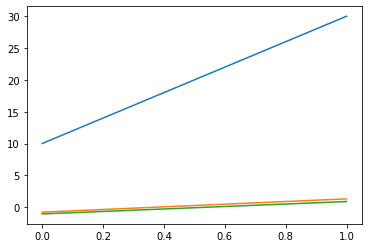

In [48]:
plt.plot(a[0])
plt.plot(norm(a)[0])
plt.plot(norm2(a)[0])
plt.show()

In [5]:
import tensorflowjs as tfjs
import tensorflow as tf

In [17]:
model = tf.keras.models.load_model('models\Lada-v1.0.h5')
model.summary()

Model: "Lada"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 26        
Total params: 278
Trainable params: 278
Non-trainable params: 0
_________________________________________________________________


In [18]:
tfjs.converters.save_keras_model(model, r'models\tfjs\Lada')